In [88]:
# tf idf on two simple strings + their cosine similarity

import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.sparse
from sklearn.metrics.pairwise import cosine_similarity

it_file = open("datasets/it_scripts.txt", "r")
it_data = it_file.read()
it_file.close()
# print(it_data)

coco_file = open("datasets/coco_scripts.txt", "r")
coco_data = coco_file.read()
coco_file.close()
# print(coco_data)

docA = "the car is driven on the road"
docB = "the truck is driven on the highway" 

# vectorize documents using tfidf and then transfer the info into a table of frequencies of each word in each document
tfidf = TfidfVectorizer()
response = tfidf.fit_transform([docA, docB])
df = pd.DataFrame(response.toarray()).set_axis([feature_names], axis=1).set_axis(['docA', 'docB'], axis=0) 
display(df)

# feature_names = tfidf.get_feature_names()
# for col in response.nonzero()[1]:
#     print (feature_names[col], ' - ', response[0, col])
#     print (feature_names[col], ' - ', response[1, col])
print(cosine_similarity([df.iloc[0]], [df.iloc[1]]))

,car,driven,highway,is,on,road,the,truck
docA,0.424717,0.30219,0.000000,0.30219,0.30219,0.424717,0.60438,0.000000
docB,0.000000,0.30219,0.424717,0.30219,0.30219,0.000000,0.60438,0.424717


[[0.63923062]]


In [58]:
# knn with a dataset i found online.
# the attributes of this dataset (length, diameter, etc.) 
# can be replaced with the words (such as car, driven, etc. from the above dataframe)
# when we do text mining

import pandas as pd

aba_df = pd.read_csv("datasets/abalone.data", header=None)
# rings is the variable we want to predict 
aba_df.columns = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
aba_df = aba_df.drop("Sex", axis=1)
display(aba_df)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [84]:
# setting up training set
from sklearn.neighbors import KNeighborsRegressor

# split into training and testing sets (TWO WAYS)
# WAY 1
# aba_train = aba_df.loc[:3000].copy()
# aba_test = aba_df.loc[3001:].copy()
# X_train = aba_train[["Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight"]]
# X_test = aba_test[["Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight"]]
# y_train = aba_train["Rings"]
# y_test = aba_test["Rings"]

# WAY 2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    aba_df[["Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight"]], 
    aba_df["Rings"], 
    test_size=0.2, random_state=12345)

# doing knn
# PROBLEM: im using KNeighborRegressor but it cant use cosine similarity as the distance metric
# links to KNeighborRegressor and the available distances metrics it has:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
# https://scikit-learn.org/0.24/modules/generated/sklearn.neighbors.DistanceMetric.html

knn_model = KNeighborsRegressor(n_neighbors=64)
knn_model.fit(X=X_train, y=y_train)

# evaluate the performance of our model using MSE
# - "predict" y values of X_train values
# - compare these predicted values to the actual values y_train to evaluate
from sklearn.metrics import mean_squared_error
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
display(mse)

# compare predicted values on the testing set to the actual values y_test
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
display(mse)

4.670687618672366

5.006943114066238

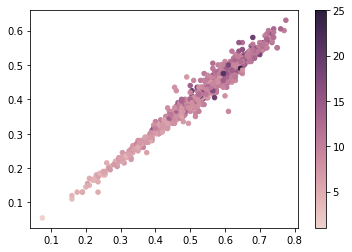

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test["Length"], X_test["Diameter"], c=y_test, s=20, cmap=cmap
)
f.colorbar(points)
plt.show()